# Intro to Correlation and Regression

<span style="color:green"> recap what you did in previous notebook and during lecture. Tell students that we are now going to take them through the same steps to do some cool analysis on their dataset! Map out an idea of what the goal of this lab is so students have this big picture in mind as they proceed </span>




One of the most important and interesting aspects of data science is making predictions about the future. How can we learn about temperatures a few decades from now by analyzing historical data about climate change and pollution? Based on a person's social media profile, what conclusions can we draw about their interests? How can we use a patient's medical history to judge how well he or she will respond to a treatment?
Run the cell below to import the code we'll use in this notebook. Don't worry about getting an output, simply run the cell.

In [2]:
!pip install datascience
!pip install numpy
!pip install matplotlib
!pip install statsmodels.formula.api
import datascience
import numpy as np
import pandas
import matplotlib.pyplot as plots
import scipy as sp

%matplotlib inline



  Could not find a version that satisfies the requirement statsmodels.formula.api (from versions: )
No matching distribution found for statsmodels.formula.api


We will be using data from the website of the Office of Environmental Health Hazard Assessment. The file includes environmental and population data across different counties of California. In order to analyze the data, we must first import it to our Jupyter notebook and create a table.


In [3]:
data = datascience.Table.read_table("Downloads/ces_data-2.csv")
data.show(5)

Census Tract,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 Percentile Range,Total Population,California County,Children < 10 (%),Pop 11-64 years (%),Elderly > 65 (%),Hispanic (%),White (%),African American (%),Native American (%),Asian American (%),Other (%),ZIP,Nearby City (to help approximate location only),Longitude,Latitude,CES 3.0 Percentile,CES 3.0 Percentile Range,SB 535 Disadvantaged Community,Ozone,Ozone Pctl,PM2.5,PM2.5 Pctl,Diesel PM,Diesel PM Pctl,Drinking Water,Drinking Water Pctl,Pesticides,Pesticides Pctl,Tox. Release,Tox. Release Pctl,Traffic,Traffic Pctl,Cleanup Sites,Cleanup Sites Pctl,Groundwater Threats,Groundwater Threats Pctl,Haz. Waste,Haz. Waste Pctl,Imp. Water Bodies,Imp. Water Bodies Pctl,Solid Waste,Solid Waste Pctl,Pollution Burden,Pollution Burden Score,Pollution Burden Pctl,Asthma,Asthma Pctl,Low Birth Weight,Low Birth Weight Pctl,Cardiovascular Disease,Cardiovascular Disease Pctl,Education,Education Pctl,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
6.019e+09,94.09,100,95-100% (highest scores),3174,Fresno,18.8,73.6,7.6,65.3,4.2,24.6,0.5,3.5,1.8,93706,Fresno,-119.782,36.7097,100,95-100% (highest scores),Yes,0.065,98.18,15.4,97.22,48.524,95.54,681.2,80.92,2.75,47.82,18552,97.46,909.14,62.98,80.5,98.67,45.75,89.85,0.795,84.32,0,0,21.75,97.81,79.96,9.85,99.95,131.64,97.67,7.44,93.84,14.13,96.31,53.3,95.76,16.2,77.51,76.3,97.12,17.6,91.72,26,79.4,92.12,9.55,99.7
6.071e+09,90.68,99.99,95-100% (highest scores),6133,San Bernardino,19.7,76.1,4.2,91.1,5.8,0.7,0.3,1.4,0.7,91761,Ontario,-117.618,34.0578,99.99,95-100% (highest scores),Yes,0.062,91.1,13.31,93.64,38.556,92.12,904.66,96.11,1.37,41.34,7494.24,89.05,782.26,55.66,66.2,97.68,36,85.57,1.25,88.77,5,55.01,12,92.17,81.19,10,100,60.66,69.78,7.04,90.85,12.94,92.66,53.3,95.76,33.4,96.25,72.5,94.63,12.3,71.82,34.1,93.75,87.44,9.07,98.11
6.019e+09,85.97,99.97,95-100% (highest scores),3167,Fresno,21.5,72.5,6,63.6,5.3,18.9,0.6,9.8,1.8,93706,Fresno,-119.806,36.7355,99.97,95-100% (highest scores),Yes,0.062,91.1,15.4,97.22,47.445,95.42,681.2,80.92,3.03,48.75,12454.9,95.42,576.52,39,22,85.13,30.25,81.93,0.2,60.5,0,0,2.5,57.18,71.16,8.76,99,142.12,98.33,10.16,99.78,14.96,97.67,42.3,89.06,16.7,78.39,86.8,99.56,16.1,87.98,40.1,97.85,94.58,9.81,99.99
6.077e+09,82.49,99.96,95-100% (highest scores),6692,San Joaquin,18.7,74.5,6.8,57.4,6,12.5,0.3,20.9,2.8,95203,Stockton,-121.315,37.9405,99.96,95-100% (highest scores),Yes,0.046,53.02,12.54,84.02,24.117,73.52,278.76,29.11,12.93,60.56,2387.78,69.97,1305.01,78.29,50.1,96.1,132.1,98.41,0.795,84.32,19,98.63,27,99.1,74.48,9.17,99.59,142.17,98.34,6.23,80.65,14.72,97.17,40.8,87.52,15.3,75.14,61.3,85.57,19.6,94.97,21.1,63.54,86.7,8.99,97.72
6.019e+09,82.03,99.95,95-100% (highest scores),2206,Fresno,14.8,72.1,13.1,71.8,21.4,1.2,0.5,4.5,0.6,93725,Fresno,-119.718,36.6816,99.95,95-100% (highest scores),Yes,0.065,98.18,15.4,97.22,18.846,58.22,1000.24,98.64,3518.41,95.15,21790.7,98.15,435.16,24.3,60,97.15,54.2,92.09,13.1,99.7,0,0,50.8,99.91,80.2,9.88,99.99,90.48,89.54,4.5,38.92,12.82,92.36,45.1,91.13,14.7,73.72,66.4,90.23,18.6,93.65,28.1,83.98,80.08,8.3,92.76


<span style="color:green"> Briefly explain what NaN values are, why they are a problem, and show students what they look like in the table above. Show them also that the size of the table below is smaller than the above so they get a sense of the change! </span>

When doing data analysis, a lot of our work involves cleaning the data by removing NaN values. This way our data is in a format where we can carry out analysis, extract useful information and make predictive models. The following code extracts a cleaner version of the data for us, excluing null values and selecting only the useful columns. (You do not need to learn to clean data in this module)

In [5]:
clean_data = datascience.Table.read_table("clean_ces_data.csv")

clean_data

Unnamed: 0,Census Tract,Total Population,California County,Hispanic (%),White (%),African American (%),Native American (%),Asian American (%),Other (%),Asthma,Cardiovascular Disease,Poverty,Unemployment
0,6.019e+09,3174,Fresno,65.3,4.2,24.6,0.5,3.5,1.8,131.64,14.13,76.3,17.6
1,6.071e+09,6133,San Bernardino,91.1,5.8,0.7,0.3,1.4,0.7,60.66,12.94,72.5,12.3
2,6.019e+09,3167,Fresno,63.6,5.3,18.9,0.6,9.8,1.8,142.12,14.96,86.8,16.1
3,6.077e+09,6692,San Joaquin,57.4,6,12.5,0.3,20.9,2.8,142.17,14.72,61.3,19.6
4,6.019e+09,2206,Fresno,71.8,21.4,1.2,0.5,4.5,0.6,90.48,12.82,66.4,18.6
5,6.0372e+09,2598,Los Angeles,98.1,1.2,0.1,0.1,0.2,0.3,68.74,10.4,66.4,11.6
6,6.077e+09,2396,San Joaquin,51.8,16.4,16.4,1.3,9.9,4.1,169.56,12.7,76.2,14.4
7,6.019e+09,4106,Fresno,52.7,2.7,28.7,0.4,14.3,1.2,142.28,14.96,74.5,20
8,6.03721e+09,2146,Los Angeles,79.3,8.9,4.1,0.1,7.2,0.5,58.03,7.24,75.7,28.5
9,6.019e+09,6343,Fresno,78,9.1,5.8,0.8,5.3,0.9,107.8,14.75,83.4,23.5


### The correlation coefficient - r

<span style="color:green"> try not to jump into using X and Y variables immediately -- students who don't have a mathy background will get lost immediately. Instead, try to explain r in the context of something first: the relationship between height and weight of a person, for example, and refer to X as height and Y as weight. Give students of an example to cling onto so they can make these concepts more tangible!</span>

The correlation coefficient ranges from −1 to 1. A value of 1 implies that a linear equation describes the relationship between X and Y perfectly, with all data points lying on a line for which Y increases as X increases. A value of −1 implies that all data points lie on a line for which Y decreases as X increases. A value of 0 implies that there is no linear correlation between the variables. ~Wikipedia


<span style="color:green">show an example!</span>

r = 1: the scatter diagram is a perfect straight line sloping upwards <br>
r = -1: the scatter diagram is a perfect straight line sloping downwards.

Suppose we wanted to find out whether a particular race is more prone to a particular disease. Calculating the correlation coefficient would help in our analysis to answer this question. As an example, suppose we want to know whether being hispanic means you are more prone to a cardiovascular disease. A high correlation coefficient closer to 1 would support this argument, while a negative one would oppose it. What would a value of 0 for the correlation coefficent suggest?

We use the following code to calculate a value for our correlation coefficient.

<span style="color:green">explain step by step what the following code does. Also instead of indexing by numbers, select columns by using actual names -- this will be a lot more natural for students to understand</span>

In [6]:


hispanic = clean_data[4]

asthma= clean_data[10]

sp.stats.pearsonr(hispanic, asthma)

(0.3590919232423713, 8.425623308934435e-229)


This function prints two numbers. The first number is our r value, and the second number is the p-value for our correlation. A p-value of under .05 indicates strong validity in the correlation. 

<span style="color:green">^^ interpret these numbers!</span>

#### To Do:

Pick a race of your choice and calculate the correlation coefficient with cardio vascular disease.

<span style="color:green">**For your lecture notebook, focus on explaining what these statistical concepts mean!**</span>

### Regression

<span style="color:green">Try to explain regression in more laymens terms -- students won't know what it means for the line to fit the data best.</span>

Regression is an important tool in data science to make predictions based on data. The regression line is the best fit line for our data. It’s like an average of where all the points line up. In linear regression, the regression line is a perfectly straight line! 

In regression, we use the value of one variable (which we will call x
) to predict the value of another (which we will call y
). When the variables x
 and y
 are measured in standard units, the regression line for predicting y
 based on x
 has slope r
 and passes through the origin. Thus the equation of the regression line can be written as:

estimate of y = r * x   


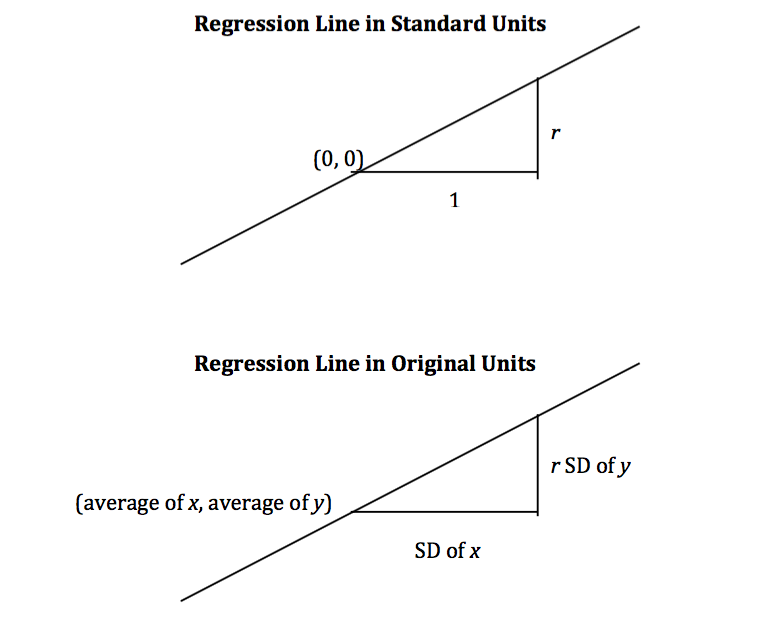

In [7]:
from IPython.display import Image
Image("Downloads/regline.png")

Following are the equations to calculate the equation of regression line.


Slope of the regression line = r⋅SD of y / SD of x

Intercept of the regression line = average of y − slope⋅average of x

The three functions below compute the correlation, slope, and intercept. All of them take three arguments: the name of the table, the label of the column containing x, and the label of the column containing y. (The earlier method of calculating the correlation on the previous section is a shorthand method where the computer does all the computation!)

<span style="color:green"> explain this in detail in lecture!</span>

In [8]:
def standard_units(xyz):
    return (xyz - np.mean(xyz))/np.std(xyz) 

def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))

def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))

def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))




Suppose we want to find the equation of the regression line for the variables in the previous section - Race & Disease. We pick the same example again - Hispanic & Cardio Vascular.

In [9]:
slope_of_reg_line = slope(clean_data, "Hispanic (%)", "Asthma")
slope_of_reg_line



0.41220490076911265

In [10]:
intercept_of_reg_line = intercept(clean_data, "Hispanic (%)", "Asthma")
intercept_of_reg_line

37.19143315337998

Given the slope and intercept, what would the equation of the regression line of best fit be?


We can also plot our regression line for a better visual to inspect the relationship between race and disease. The following code plots that:

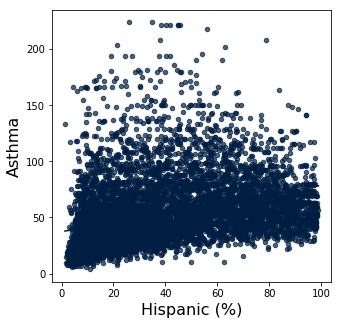

In [11]:
clean_data.scatter("Hispanic (%)", "Asthma", fit_line=True)


#### To Do:

Pick a race of your choice. Find the equation of regression line for that race with cardio vascular disease and plot a graph of your work.

#### Multiple Linear Regression

Our simple linear model is limited because it can only use one variable in our dataset. Many datasets have many potentially useful variables, and multiple linear regression can take advantage of that